In [1]:
import pandas as pd

file_path = './Final_Merged_Time_Corrected.xlsx'
data = pd.read_excel(file_path)

# 딕셔너리 사용 한국어 말고 영어로 통일하여 사용하는 것이 안정 코드 쓰기도 편하고

column_mapping = {
    '지점': 'Point',
    '지점명': 'Point name',
    '일시': 'Timestamp',
    '기온(°C)': 'Temp',
    '풍향(deg)': 'Wind Direction',
    '풍속(m/s)': 'Wind Speed',
    '강수량(mm)': 'Precipitation',
    '수온': 'Water Temp',
    'pH': 'pH',
    '용존산소(㎎/L)': 'DO',
    '총질소(㎎/L)': 'TN',
    '총인(㎎/L)': 'TP',
    '총유기탄소': 'TOC'
}


data.rename(columns=column_mapping, inplace=True)


updated_file_path = './Final_Merged_English_Columns.xlsx'
data.to_excel(updated_file_path, index=False)


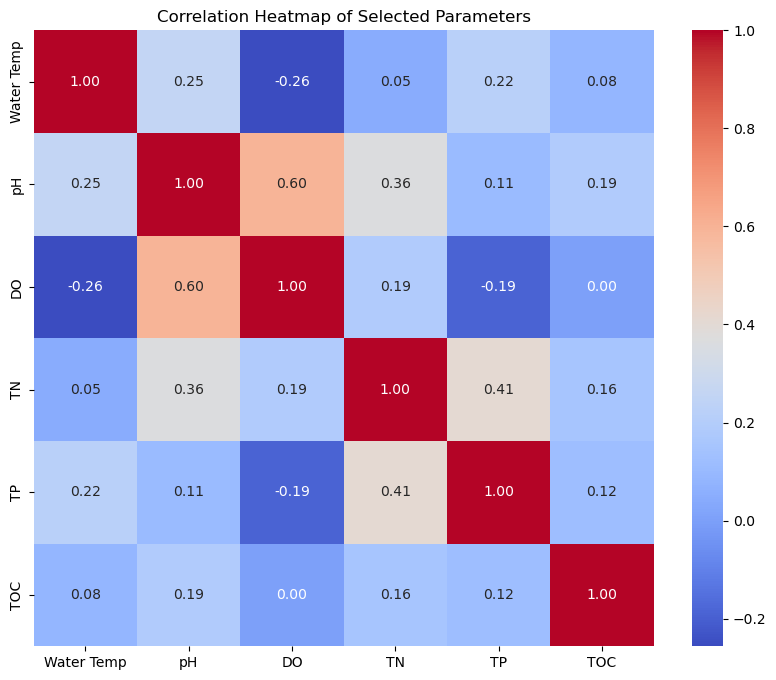

In [2]:
#통함된 데이터 히트맵 시각화



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = './Final_Merged_English_Columns.xlsx'
data = pd.read_excel(file_path)

relevant_columns = ['Water Temp', 'pH', 'DO', 'TN', 'TP', 'TOC']
correlation_data = data[relevant_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Parameters')
plt.show()


            Water Temp        pH        DO        TN        TP       TOC
Water Temp    1.000000  0.254761 -0.256343  0.045434  0.216465  0.082916
pH            0.254761  1.000000  0.596215  0.362139  0.106403  0.186487
DO           -0.256343  0.596215  1.000000  0.188130 -0.192027  0.000729
TN            0.045434  0.362139  0.188130  1.000000  0.406460  0.155556
TP            0.216465  0.106403 -0.192027  0.406460  1.000000  0.121050
TOC           0.082916  0.186487  0.000729  0.155556  0.121050  1.000000


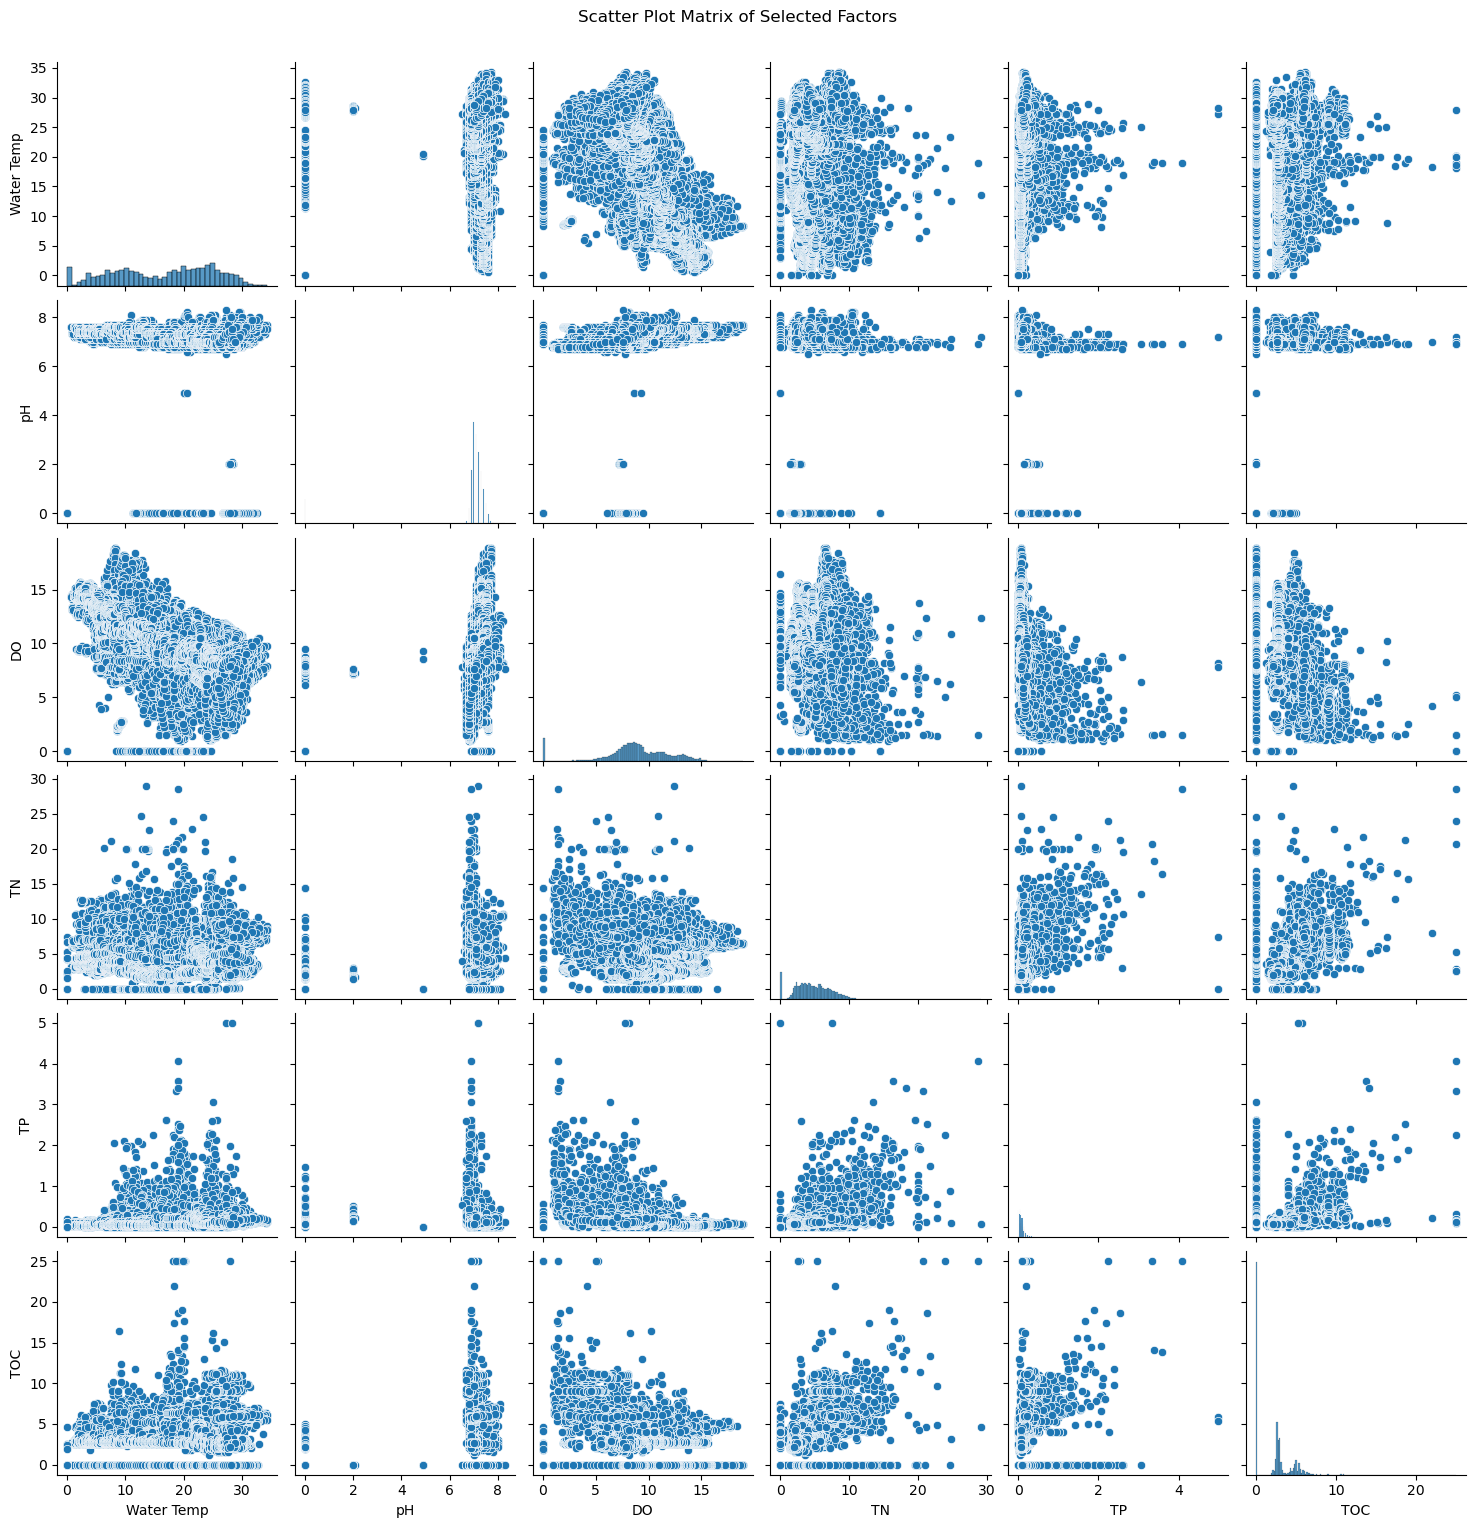

In [3]:
# 상관관계에 대한 각가의 산점도 출력 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = './Final_Merged_English_Columns.xlsx'
data = pd.read_excel(file_path)

# 상관계수 계산 1,0,-1 기준으로
relevant_columns = ['Water Temp', 'pH', 'DO', 'TN', 'TP', 'TOC']
correlation_matrix = data[relevant_columns].corr()
print(correlation_matrix)

sns.pairplot(data[relevant_columns])
plt.suptitle("Scatter Plot Matrix of Selected Factors", y=1.02)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                     DO   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 2.377e+04
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:58:38   Log-Likelihood:            -1.0203e+05
No. Observations:               43108   AIC:                         2.041e+05
Df Residuals:                   43106   BIC:                         2.041e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7588      0.054     13.983      0.0

/var/folders/m4/n8vl07s542z_c183fy2x0q_m0000gn/T/ipykernel_40787/2219452146.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['pH'], y=data['DO'], palette="coolwarm")


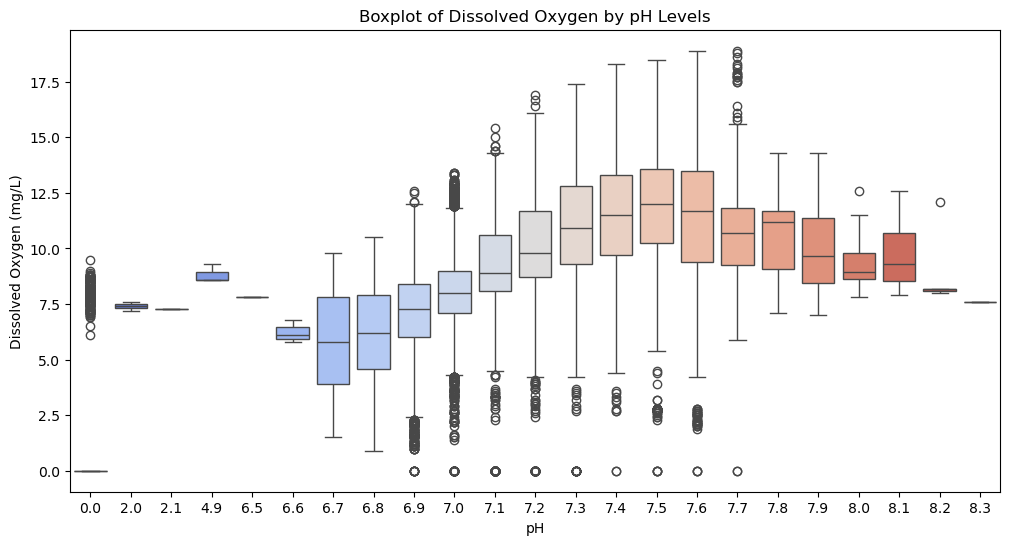

In [4]:
#ph do 간의 관계 (선형회귀) 

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

file_path = './Final_Merged_English_Columns.xlsx'
data = pd.read_excel(file_path)

# 선형 회귀 분석
X = data['pH']
y = data['DO']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

# 상자 수염 그래프
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['pH'], y=data['DO'], palette="coolwarm")
plt.title('Boxplot of Dissolved Oxygen by pH Levels')
plt.xlabel('pH')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.show()


###### 6개 각각의 데이터 통계량 분석

In [6]:
#6개에 대한 평균, 중앙값 및 신뢰구간 

import pandas as pd
import scipy.stats as stats
import numpy as np

file_path = './Final_Merged_English_Columns.xlsx'
data = pd.read_excel(file_path)

relevant_columns = ['Water Temp', 'pH', 'DO', 'TN', 'TP', 'TOC']

# 기초 통계량
summary_stats = data[relevant_columns].describe()

# 신뢰 구간(95%), 표준오차 
confidence_intervals = {}
for column in relevant_columns:
    mean = data[column].mean()
    sem = stats.sem(data[column])
    ci = stats.t.interval(0.95, len(data[column])-1, loc=mean, scale=sem)
    confidence_intervals[column] = ci

print("기초 통계량:\n", summary_stats)
print("\n95% 신뢰 구간:\n", confidence_intervals)


기초 통계량:
          Water Temp            pH            DO            TN            TP  \
count  43108.000000  43108.000000  43108.000000  43108.000000  43108.000000   
mean      16.467939      6.768690      8.903477      4.856485      0.112047   
std        8.428710      1.592475      3.213946      2.557998      0.145756   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        9.300000      7.000000      7.500000      3.030000      0.050000   
50%       17.900000      7.100000      8.800000      4.645000      0.084000   
75%       23.700000      7.300000     11.000000      6.600000      0.130000   
max       34.300000      8.300000     18.900000     29.020000      4.990000   

                TOC  
count  43108.000000  
mean       2.060556  
std        2.188241  
min        0.000000  
25%        0.000000  
50%        2.600000  
75%        3.000000  
max       25.000000  

95% 신뢰 구간:
 {'Water Temp': (16.38836992934354, 16.547507402010268), 'pH': (6.753

Water Temp 이상치 개수: 0
pH 이상치 개수: 2447
DO 이상치 개수: 2366
TN 이상치 개수: 299


/var/folders/m4/n8vl07s542z_c183fy2x0q_m0000gn/T/ipykernel_40787/127960126.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column, ax=axes[idx], palette='coolwarm')
/var/folders/m4/n8vl07s542z_c183fy2x0q_m0000gn/T/ipykernel_40787/127960126.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column, ax=axes[idx], palette='coolwarm')
/var/folders/m4/n8vl07s542z_c183fy2x0q_m0000gn/T/ipykernel_40787/127960126.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column, ax=axes[idx], palette='coolwarm'

TP 이상치 개수: 2437
TOC 이상치 개수: 443


/var/folders/m4/n8vl07s542z_c183fy2x0q_m0000gn/T/ipykernel_40787/127960126.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column, ax=axes[idx], palette='coolwarm')


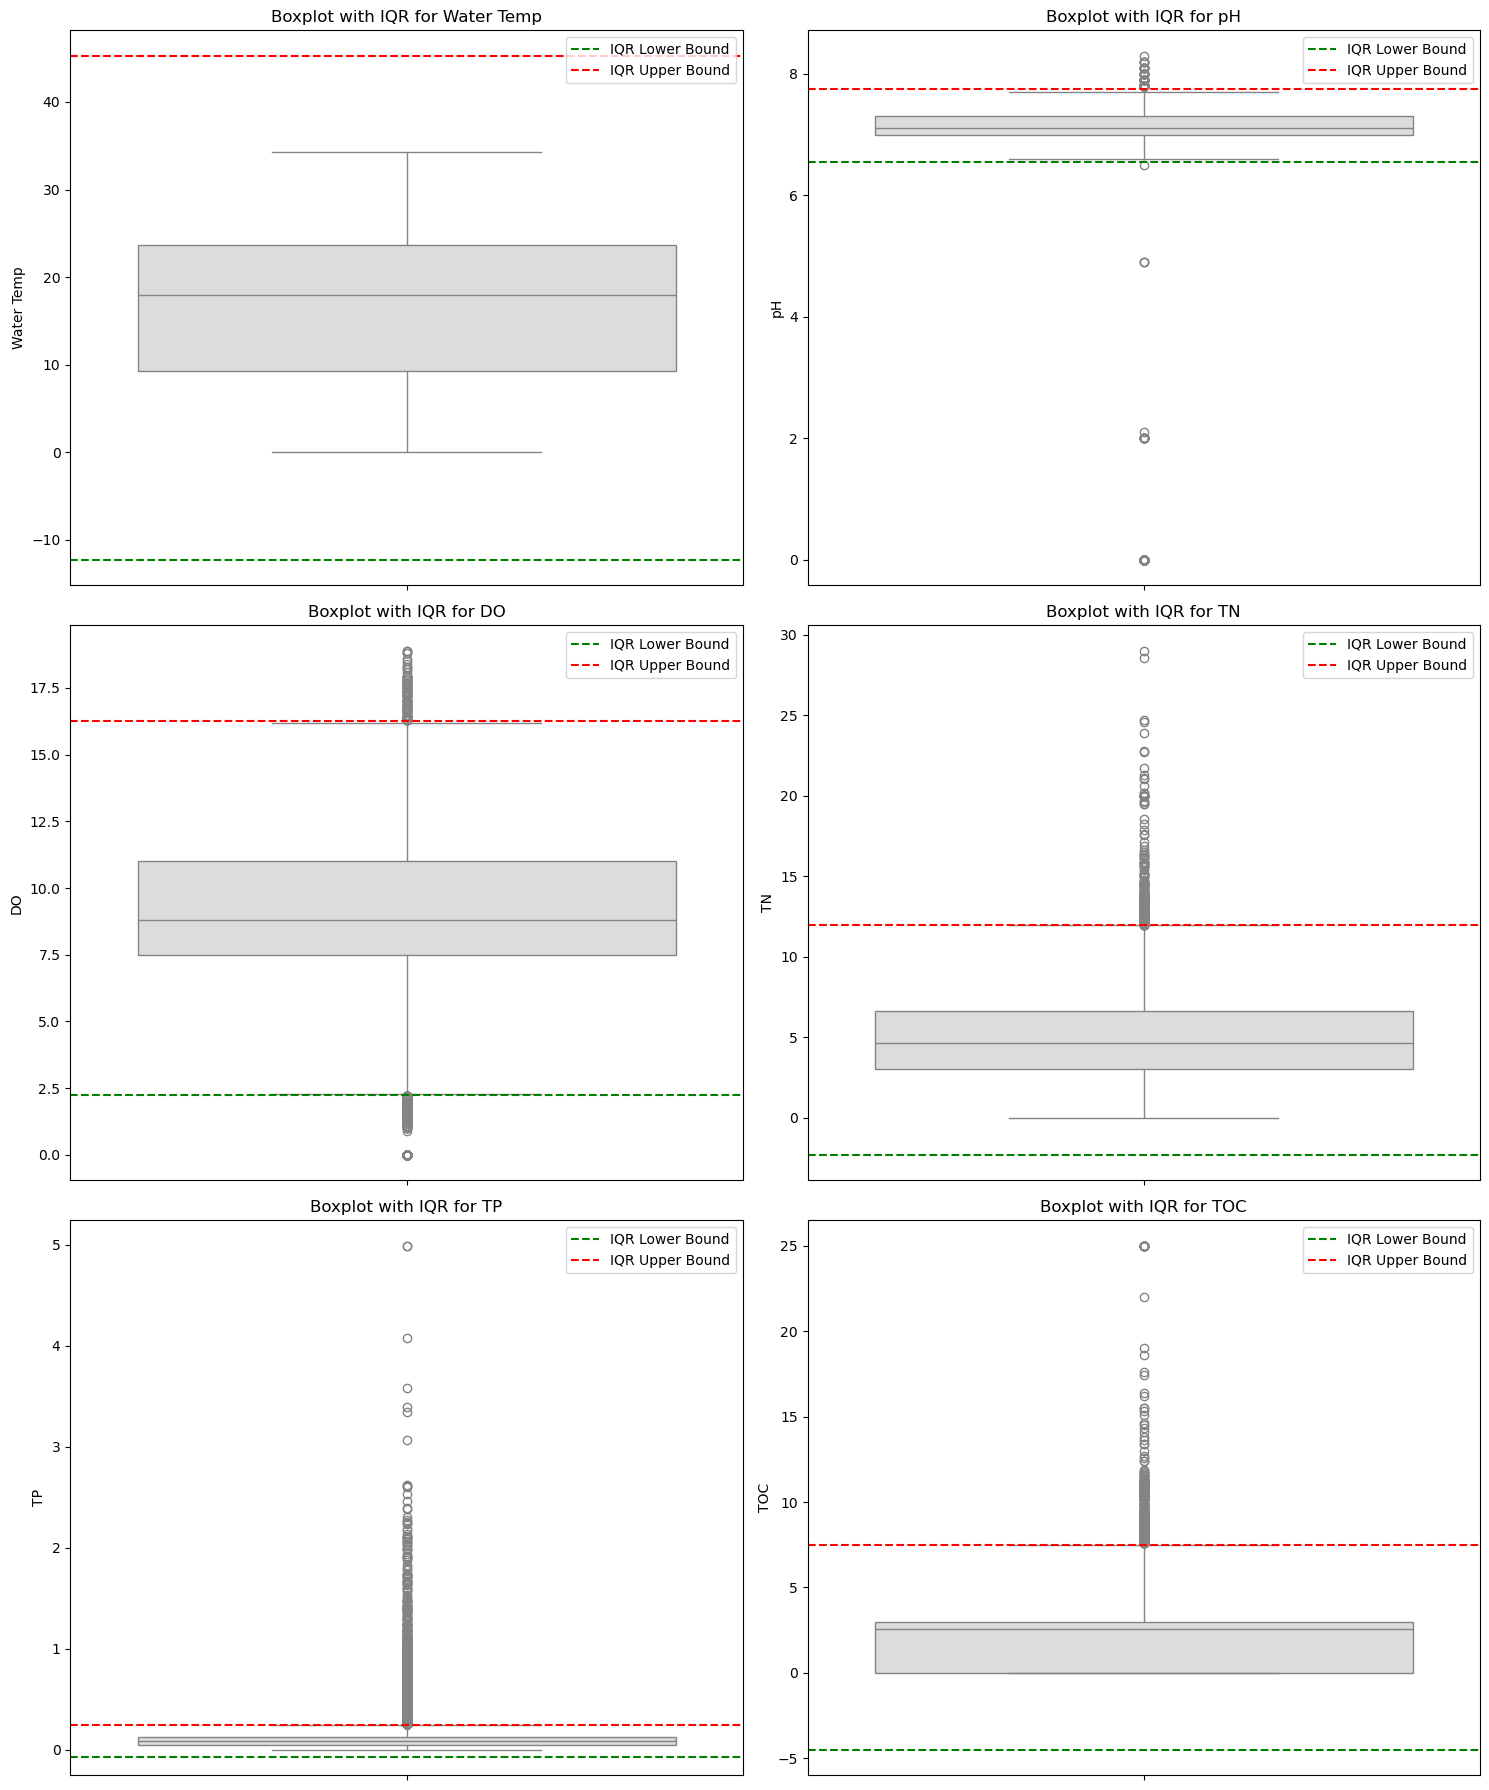

In [12]:
#6개 데이터에 대한 iqr 이상치 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = './Final_Merged_English_Columns.xlsx'
data = pd.read_excel(file_path)


relevant_columns =['Water Temp', 'pH', 'DO', 'TN', 'TP', 'TOC']

# IQR 기반 이상치를 상자수염그래프로 시각화
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for idx, column in enumerate(relevant_columns):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_count = outliers.shape[0]  # 이상치의 개수
    print(f"{column} 이상치 개수: {outlier_count}")

    
    sns.boxplot(data=data, y=column, ax=axes[idx], palette='coolwarm')
    axes[idx].axhline(lower_bound, color='green', linestyle='--', label='IQR Lower Bound')
    axes[idx].axhline(upper_bound, color='red', linestyle='--', label='IQR Upper Bound')
    axes[idx].set_title(f'Boxplot with IQR for {column}')
    axes[idx].legend()


plt.tight_layout()
plt.show()
